## Ground Truth Test

In [2]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet50_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Files already downloaded and verified
Before temperature - NLL: 0.359, ECE: 0.047
Optimal temperature: 4.908
After temperature - NLL: 0.827, ECE: 0.421


APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8694 ± 0.0035
Final Average Prediction Set Size: 0.97 ± 0.01
Final Average Coverage: 0.8946 ± 0.0038
Final Average Real Probability: 0.8665 ± 0.0038


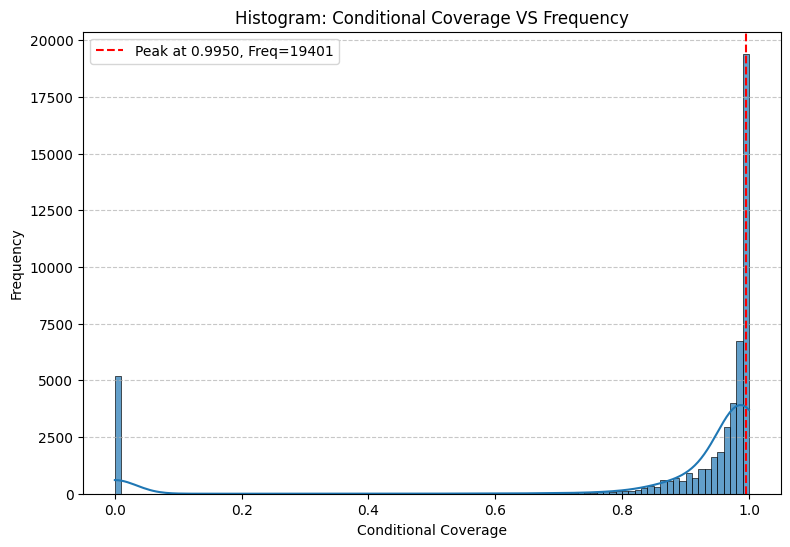

19401 (38.80%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8710 ± 0.0034
Final Average Prediction Set Size: 0.92 ± 0.01
Final Average Coverage: 0.8943 ± 0.0038
Final Average Real Probability: 0.8605 ± 0.0040


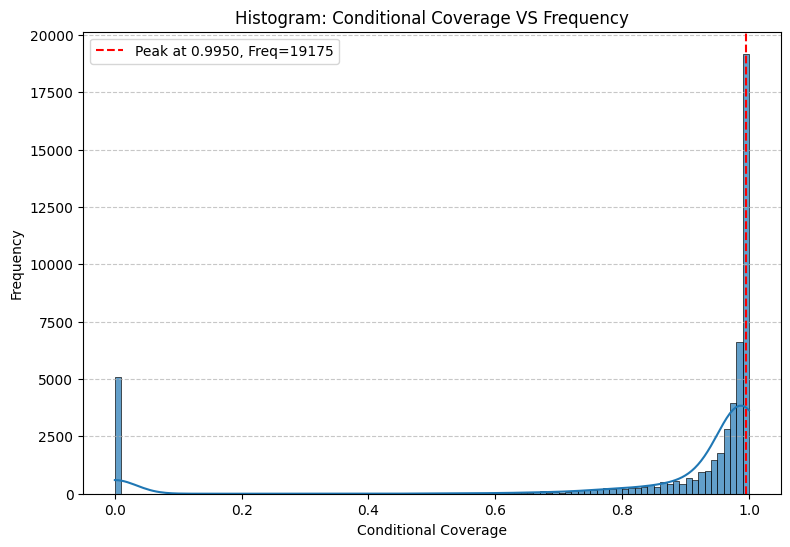

19175 (38.35%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=1, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8751 ± 0.0044
Final Average Prediction Set Size: 0.91 ± 0.00
Final Average Coverage: 0.8979 ± 0.0044
Final Average Real Probability: 0.8624 ± 0.0044


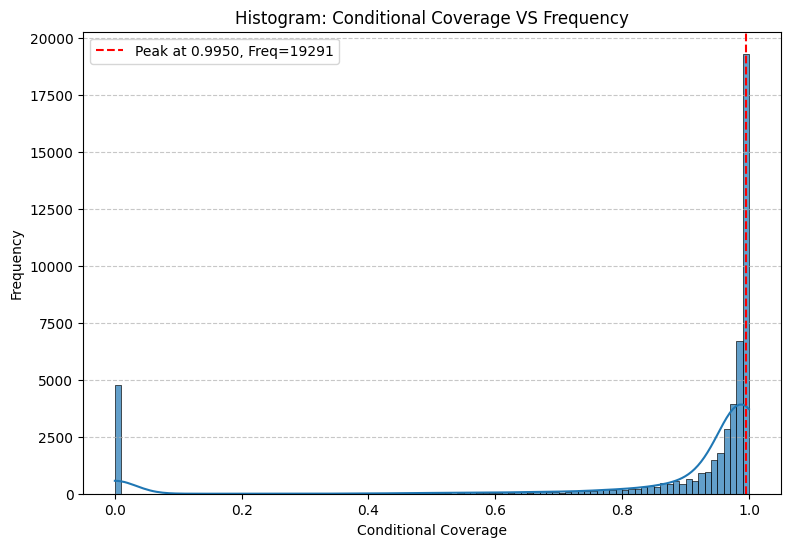

19291 (38.58%) samples reached the peak conditional coverage at 0.9950


In [5]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.0, num_runs=10, alpha=0.1)

## Model Test

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5329 ± 0.0041
Final Average Prediction Set Size: 1.39 ± 0.02
Final Average Coverage: 0.8938 ± 0.0048
Final Average Real Probability: 0.8660 ± 0.0051


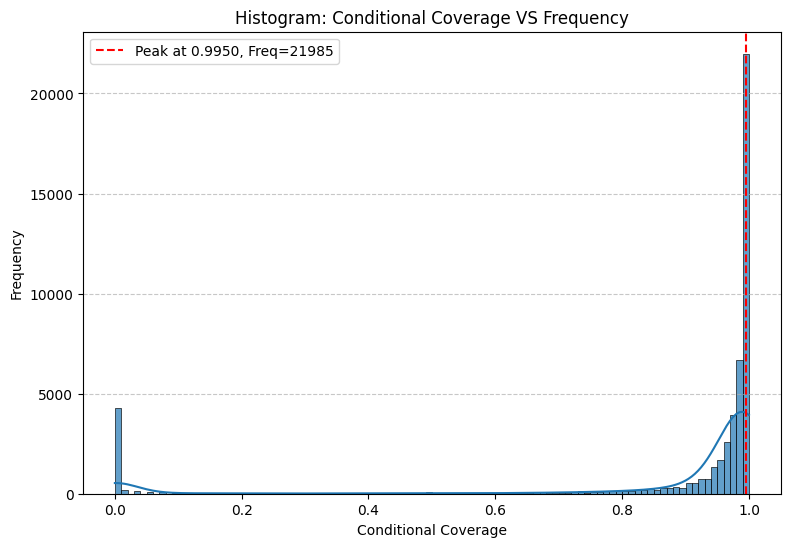

21985 (43.97%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5329 ± 0.0041
Final Average Prediction Set Size: 1.39 ± 0.02
Final Average Coverage: 0.8938 ± 0.0048
Final Average Real Probability: 0.8660 ± 0.0051


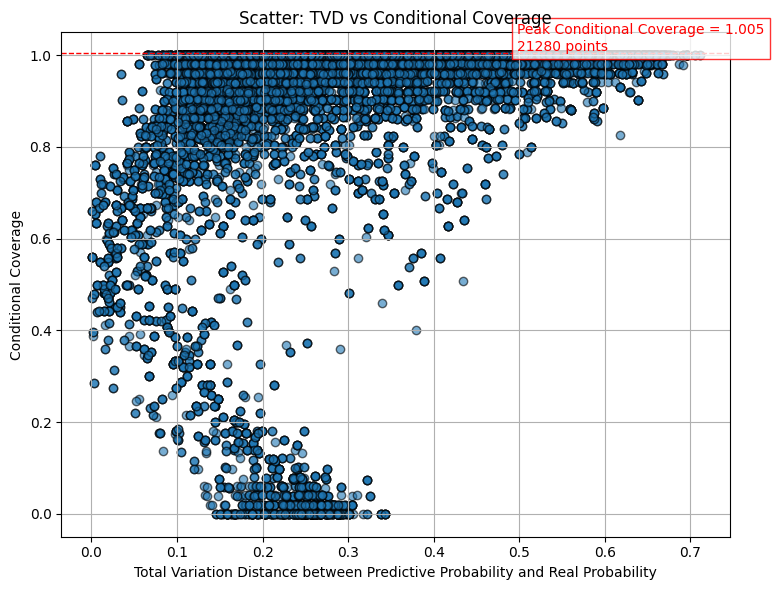

Peak Conditional Coverage = 1.005, with 21280 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.83047']
  Real Probability Set      : ['0.90196']
Sample 2:
  Predictive Probability Set: ['0.76402']
  Real Probability Set      : ['0.92453']
Sample 3:
  Predictive Probability Set: ['0.80642']
  Real Probability Set      : ['0.98077']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.46779']
  Real Probability Set      : ['0.01961']
Sample 2:
  Predictive Probability Set: ['0.54451']
  Real Probability Set      : ['0.12000']
Sample 3:
  Predictive Probability Set: ['0.32016', '0.26605']
  Real Probability Set      : ['0.00000', '0.02000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.20665', '0.14252', '0.12512']
  Real Probability Set      : ['0.01961', '0.68627', '0.03922']
Sample 2:
  Predictive Probability Set: ['0.2431

In [6]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5557 ± 0.0042
Final Average Prediction Set Size: 1.13 ± 0.01
Final Average Coverage: 0.8967 ± 0.0041
Final Average Real Probability: 0.8666 ± 0.0042


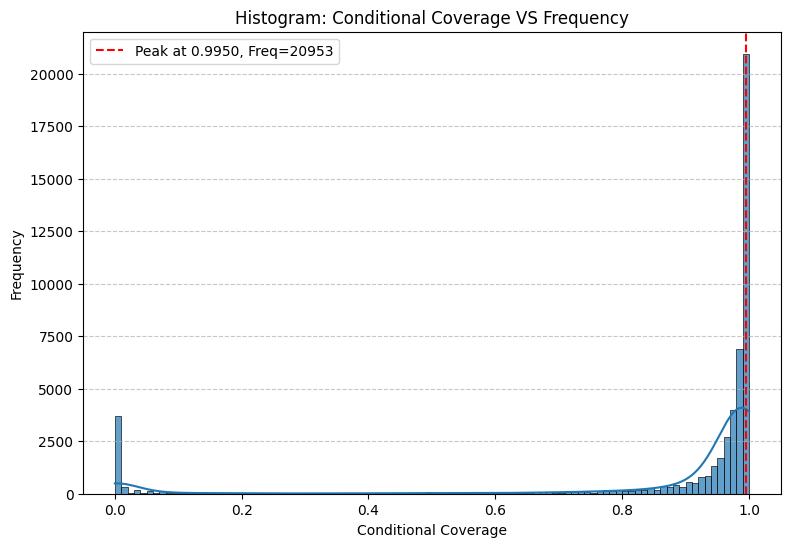

20953 (41.91%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=1, num_runs=10, alpha=0.1, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5557 ± 0.0042
Final Average Prediction Set Size: 1.13 ± 0.01
Final Average Coverage: 0.8967 ± 0.0041
Final Average Real Probability: 0.8666 ± 0.0042


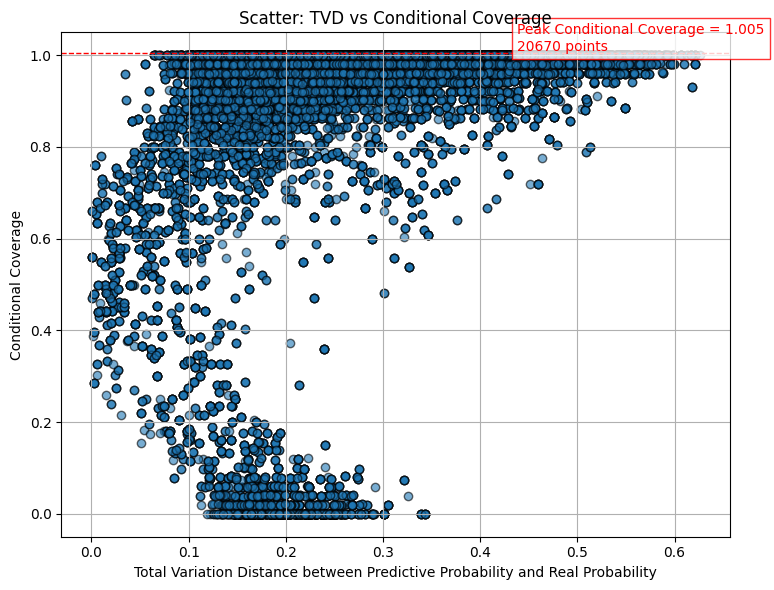

Peak Conditional Coverage = 1.005, with 20670 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.77798']
  Real Probability Set      : ['0.96226']
Sample 2:
  Predictive Probability Set: ['0.79989']
  Real Probability Set      : ['0.98000']
Sample 3:
  Predictive Probability Set: ['0.66838']
  Real Probability Set      : ['0.83673']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.33205', '0.23686']
  Real Probability Set      : ['0.01887', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.49308']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.51329']
  Real Probability Set      : ['0.08000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.28106', '0.25523']
  Real Probability Set      : ['0.00000', '0.65455']
Sample 2:
  Predictive Probability Set: ['0.25739', '0.25069']
  Real 

In [7]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.1, k_reg=1, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5967 ± 0.0045
Final Average Prediction Set Size: 1.02 ± 0.01
Final Average Coverage: 0.8995 ± 0.0052
Final Average Real Probability: 0.8692 ± 0.0049


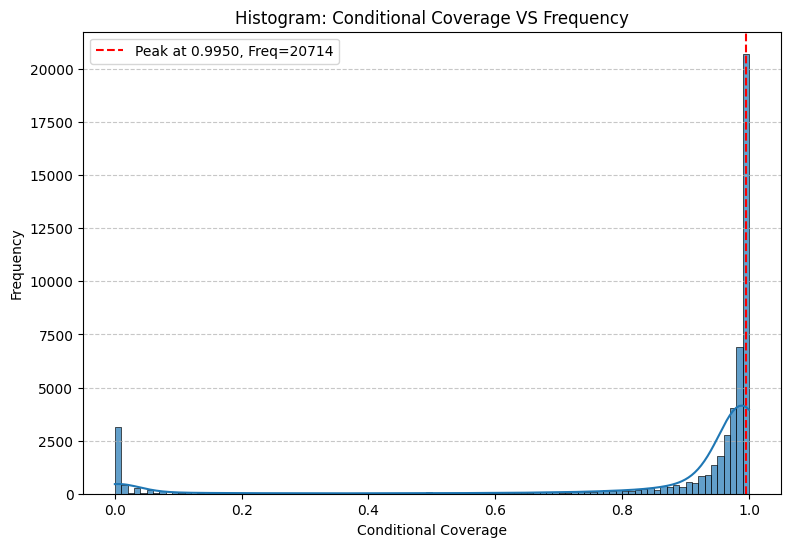

20714 (41.43%) samples reached the peak conditional coverage at 0.9950


In [5]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.0, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5967 ± 0.0045
Final Average Prediction Set Size: 1.02 ± 0.01
Final Average Coverage: 0.8995 ± 0.0052
Final Average Real Probability: 0.8692 ± 0.0049


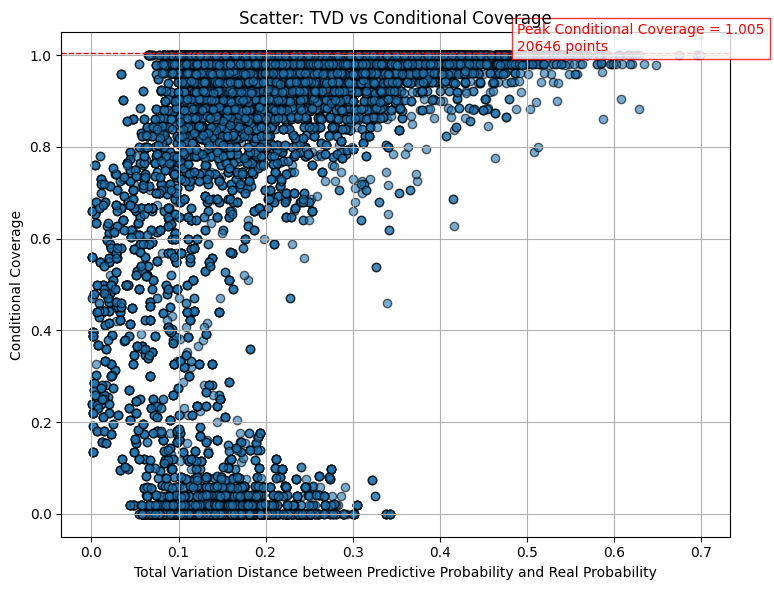

Peak Conditional Coverage = 1.005, with 20646 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.67879']
  Real Probability Set      : ['0.84615']
Sample 2:
  Predictive Probability Set: ['0.63437']
  Real Probability Set      : ['0.80000']
Sample 3:
  Predictive Probability Set: ['0.87018']
  Real Probability Set      : ['0.98039']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.54740']
  Real Probability Set      : ['0.05769']
Sample 2:
  Predictive Probability Set: ['0.56309']
  Real Probability Set      : ['0.04000']
Sample 3:
  Predictive Probability Set: ['0.42013']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.12224', '0.11605']
  Real Probability Set      : ['0.00000', '0.74000']
Sample 2:
  Predictive Probability Set: ['0.36581', '0.31242']
  Real Probability Set      :

In [8]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.0, num_runs=10, alpha=0.1)